# 1) 6개의 Toy Data에 대해 다양한 Clustering 적용해보기
### 아래 예시와 같이 다양하게 자신의 생각 도출하기
 - 지역적 패턴이 존재하는 DataSet에는 XX Clustering 방법을 쓰면 좋을 것 같다
 - XX Clustering은 길게 늘어진 데이터에 대해 잘 분류하는 것 같다
 - XX Clustering은 군집의 개수를 미리 정해야 해서 ~~ 경향이 있는 것 같다
 
### 조건
 - (기본)우리가 배운 3가지 Clustering
 - 데이터 간/클러스터 간 거리 측정 방식 다양하게 사용해서 비교
 - 새로운 Clustering 방법 사용하기(최소 2개 이상)

In [29]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice

### ToyData 만들기

In [11]:
# 다른 모양 Toy Data 6개 만들기
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [38]:
# noisy_circles, noisy_moons, blobs, no_structure, aniso, varied
X,y = noisy_moons

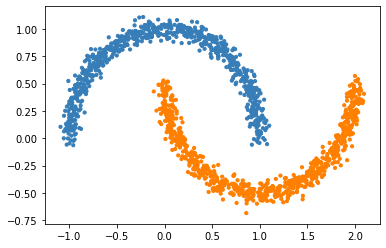

In [39]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
plt.show()

### Clustering 적용 예시

In [42]:
# KMeans 군집 모델
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)

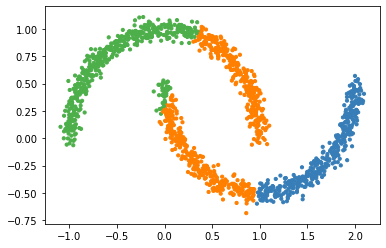

In [43]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

## 아래의 탐구 과정은 코드를 통해 직접 확인하며 분석하면 Best! 

## 하지만 본인이 탐구하고 찾아본 내용에 대해 한글이나 Word로 정리해서(그렇다고 글만 있으면 X, 그림이나 예시에 대한 시각적인 자료 활용) 제출해도 OK~

### 조건
 - 복붙은 절대X
 - 본인이 이해한 내용을 바탕으로 설명할 것!
 - 아래는 탐구하는 방법에 대한 예시

# 2) Hierarchical Clustering
### 클러스터간의 거리 측정 방식에 따른 분석
 - Min(Single Link) , Max(Complete Link), Group Average, Centroid, Ward
 - 위의 방법에 따라 각각 어떤 특징이 있을까?     
 ex) https://www.stat.cmu.edu/~ryantibs/datamining/lectures/05-clus2.pdf     
 ex) 클러스터의 형태는 어떠한지? Single Link의 Chaining, Complete Link의 Crowding...    
 ex) 이상치가 어떤 영향을 미치는지?     
 ex) http://homes.di.unimi.it/valenti/SlideCorsi/MB0910/HierarchicalClustering.pdf

# 3) K-Means Clustering
### 초기값/update Centroid
 - 랜덤 초기화, Forgy 알고리즘, MacQueen 알고리즘 등
 - K-Means++?
 
### K를 위한 Elbow Point

# 4) DBSCAN
### Eps, min_samples(minPts)의 변화에 따른 분석
 - 파라머_Clustering.ipynb의 DBSCAN 부분
 - min_samples가 커지면?
 - eps가 커지면?

### 이외에도 클러스터링에 대한 궁금증을 다양하게 깊게 파보는 과정이라면 다 좋아요!